In [20]:
# Import pandas   
import pandas as pd 
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
from matplotlib.dates import DateFormatter, DayLocator
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
from sklearn.preprocessing import MinMaxScaler


In [21]:
#prepare a database

In [22]:
# Read csv file  
table = pd.read_csv("Foreign_Exchange_Rates.csv")
table.tail(5)

,,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
5212,5212,25-12-2019,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,26-12-2019,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,27-12-2019,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,30-12-2019,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94
5216,5216,31-12-2019,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75


In [23]:
#need to be deployed database

In [24]:
#Converting string tp time object
table["Time Serie"] = pd.to_datetime(table["Time Serie"])
#arraangeing in  assending order
table = table.sort_values(by='Time Serie',ascending=True)
table =table.set_index("Time Serie") #set index 
table.drop(table.columns[0], axis=1, inplace=True) #droup unwanted colloumn
#deleteing nul values
table=table.replace(to_replace='ND', value=np.nan)
preprocess=table.dropna()

In [25]:
#need to be deployed

In [45]:
def Prediction(x,a,b,c,N):
    serise_1=np.array(preprocess[x]).astype('float64').reshape(-1, 1)
    scaler = MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
    scaled_data=scaler.fit(serise_1)
    Trasfrom_data=scaler.transform(serise_1)
    X_train, X_test = train_test_split(Trasfrom_data,test_size=0.33, random_state=42)
    a = [a,b,c]
    n = 3
    perm_iterator = itertools.permutations(a, n)
    rmsel_model=[]
    for item in perm_iterator:
        mod = ARIMA(X_train,order=item)
        res1 = mod.fit()
        predictions = res1.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)
        rmse1 = sqrt(mean_squared_error(X_test, predictions))
        n_1=[rmse1,item]
        rmsel_model.append(n_1)

    min(rmsel_model)
    mod = ARIMA(Trasfrom_data,order=min(rmsel_model)[1]).fit()
    predictions = res1.predict(start=len(serise_1), end=len(serise_1)+N, dynamic=False)# lookahaded days to predict ex: 10 days
    x=np.array(predictions).reshape(-1, 1)
    return scaled_data.inverse_transform(x)


In [46]:
#output

In [47]:
print(Prediction('TAIWAN - NEW TAIWAN DOLLAR/US$',1,2,0,10))

[[37.06590751]
 [37.0673362 ]
 [37.06876489]
 [37.07019358]
 [37.07162226]
 [37.07305095]
 [37.07447964]
 [37.07590833]
 [37.07733702]
 [37.07876571]
 [37.08019439]]


In [48]:
x=Prediction('NEW ZEALAND - NEW ZELAND DOLLAR/US$',1,2,0,10)

In [49]:
#output graph

No handles with labels found to put in legend.


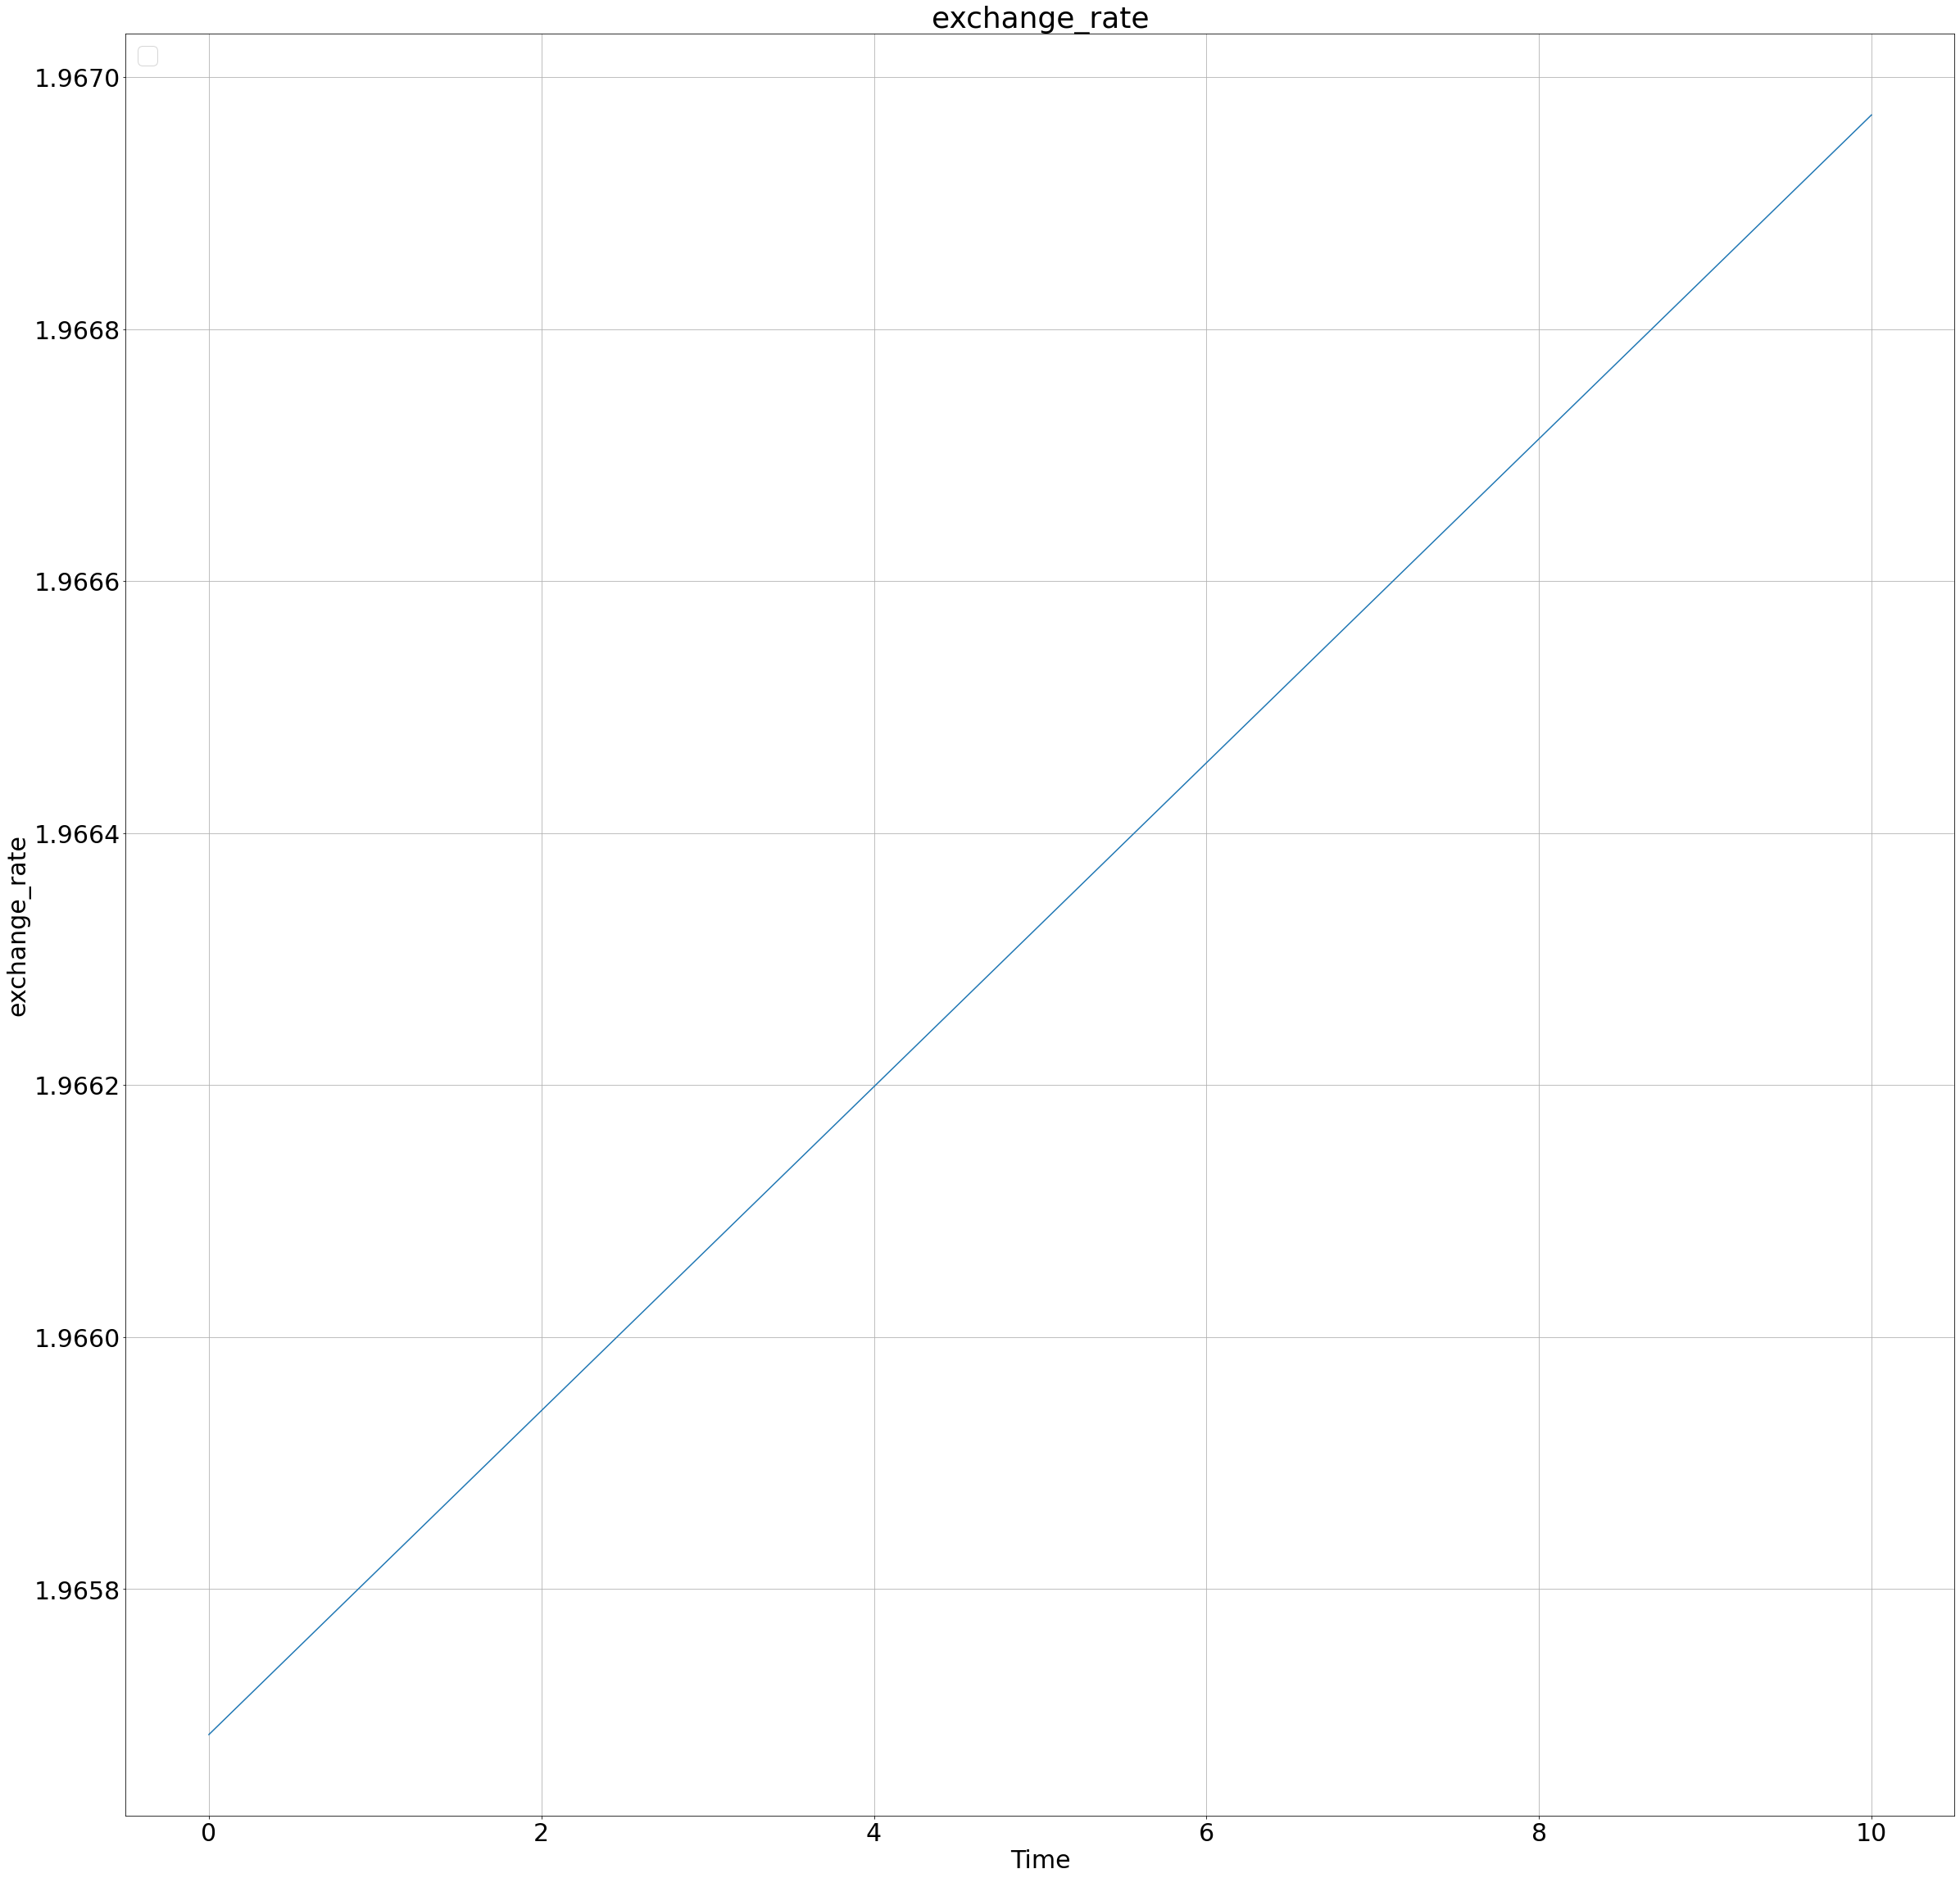

In [50]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots

plt.rc('font', size=30)
fig, ax = plt.subplots(figsize=(40,40))


# Specify how our lines should look

ax.plot(x)


# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('exchange_rate')
ax.set_title('exchange_rate')
ax.grid(True)
ax.legend(loc='upper left')

#ax.xaxis.set_major_formatter(DateFormatter("%m/%d/%Y"))